[Source](https://towardsdatascience.com/sign-language-recognition-with-advanced-computer-vision-7b74f20f3442)

In [74]:
import pandas as pd
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

## Preprocessing

In [100]:
'''
import os

# initialise data frames
train_df = pd.DataFrame()
test_df = pd.DataFrame()

image_size = [50,50]
letter_dict = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25, 'nothing':26}

train_path = '/asl_alphabet_train/asl_alphabet_train' # contains folders (need to take some for test)
test_path = '/asl_alphabet_test/asl_alphabet_test'

# process training data
for folder in os.listdir(train_path): # for each folder (i.e. letter) within train folder:
    print(folder)
    label = letter_dict[folder]
    c = 0
    for jpg in os.listdir(train_path + '/' + folder): # for each jpg of the letter:
        if c > 10:
          break;
        c+=1

        # create tensor of jpg and resize to desired pixel width and height
        image = tf.io.read_file(train_path + '/' + folder + '/' + jpg)
        image = tf.io.decode_jpeg(image, channels=1) # channel 0 = default, channel 1 = greyscale, channel 3 = rgb
        image = tf.image.resize(image, image_size)

        # turn tensor into numpy array and add as row to dataframe
        temp = np.concatenate(np.array(label), image.numpy())
        temp.resize(1,image_size[0] * image_size[1])
        np_im = np.vstack(np_im, temp)

train_df = pd.concat([train_df,pd.DataFrame(np_im)], ignore_index=True)

train_df.head()
'''

"\nimport os\n\n# initialise data frames\ntrain_df = pd.DataFrame()\ntest_df = pd.DataFrame()\n\nimage_size = [50,50]\nletter_dict = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25, 'nothing':26}\n\ntrain_path = '/asl_alphabet_train/asl_alphabet_train' # contains folders (need to take some for test)\ntest_path = '/asl_alphabet_test/asl_alphabet_test'\n\n# process training data\nfor folder in os.listdir(train_path): # for each folder (i.e. letter) within train folder:\n    print(folder)\n    label = letter_dict[folder]\n    c = 0\n    for jpg in os.listdir(train_path + '/' + folder): # for each jpg of the letter:\n        if c > 10:\n          break;\n        c+=1\n\n        # create tensor of jpg and resize to desired pixel width and height\n        image = tf.io.read_file(train_path + '/' + folder + '/' + jpg)\n        image = tf.io.deco

## Modelling

In [77]:
df = pd.read_csv("/asl_data_40000.csv")
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0,9.0,48.50,71.25,67.50,70.50,66.75,72.50,71.00,71.00,...,143.50,118.00,114.00,103.25,103.75,116.25,126.75,143.25,152.50,149.75
1,1,9.0,46.25,71.25,68.50,69.50,66.25,70.25,70.75,75.00,...,111.75,105.50,104.00,103.75,99.50,95.00,111.75,137.50,144.50,143.50
2,2,9.0,46.75,70.25,67.50,69.00,68.25,72.00,67.00,70.25,...,142.00,138.50,137.75,134.25,131.75,136.00,137.00,138.50,142.75,143.25
3,3,9.0,41.50,62.50,60.50,59.25,62.75,67.75,75.50,74.25,...,57.50,57.50,53.75,50.25,49.75,52.00,55.00,63.50,100.75,115.50
4,4,9.0,42.50,63.00,61.50,62.25,63.50,69.25,76.00,74.75,...,126.75,168.00,163.25,160.25,150.75,141.00,129.50,109.00,99.50,114.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40522,40522,26.0,51.50,81.25,69.75,73.50,73.25,70.50,70.50,72.25,...,201.00,200.50,199.50,198.50,193.75,192.25,190.25,189.00,191.00,184.25
40523,40523,26.0,50.00,76.25,71.00,72.00,68.25,67.75,64.75,70.25,...,204.50,204.00,203.75,201.50,200.50,200.50,200.50,198.00,197.25,188.75
40524,40524,26.0,28.75,36.25,43.50,45.50,51.50,57.25,56.25,58.75,...,121.25,116.25,108.00,101.00,93.50,84.50,80.25,72.75,65.75,60.25
40525,40525,26.0,26.00,23.25,24.25,23.75,24.75,24.25,23.50,23.50,...,169.50,171.50,171.25,171.25,171.00,170.50,174.50,177.75,181.25,176.25


In [78]:
## SPLIT DATA + PROCESS

from sklearn.model_selection import train_test_split as ttsplit

# shuffle data
indices = np.arange(df.shape[0])
rng = np.random.RandomState(0)
permuted_indices = rng.permutation(indices)
permuted_indices

del df['Unnamed: 0']
y = df.pop('0')

# converts dataset classes to binary to speed up training
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

x = df.values

# normalise data

x /= 255

# split data

x_train, x_test, y_train, y_test = ttsplit(x,y, test_size = 0.2, random_state = 42)

In [79]:
# reshape so model understands input
x_train = x_train.reshape(-1,50,50,1)
x_test = x_test.reshape(-1,50,50,1)

In [80]:
'''
# FOR DATA ALREADY SPLIT INTO TEST / TRAIN

train_df = pd.read_csv("/sign_mnist_train.csv")
test_df = pd.read_csv("/sign_mnist_test.csv")

y_train = train_df['label'] # each label is a letter of alphabet
y_test = test_df['label']
del train_df['label']
del test_df['label']
# x is all of the symbols, y is letters

# converts dataset classes to binary to speed up training
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = train_df.values
x_test = test_df.values

# normalise data
#x_train = x_train / 255
#x_test = x_test / 255

# reshape so model understands input
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
'''

'\n# FOR DATA ALREADY SPLIT INTO TEST / TRAIN\n\ntrain_df = pd.read_csv("/sign_mnist_train.csv")\ntest_df = pd.read_csv("/sign_mnist_test.csv")\n\ny_train = train_df[\'label\'] # each label is a letter of alphabet\ny_test = test_df[\'label\']\ndel train_df[\'label\']\ndel test_df[\'label\']\n# x is all of the symbols, y is letters\n\n# converts dataset classes to binary to speed up training\nfrom sklearn.preprocessing import LabelBinarizer\nlabel_binarizer = LabelBinarizer()\ny_train = label_binarizer.fit_transform(y_train)\ny_test = label_binarizer.fit_transform(y_test)\n\nx_train = train_df.values\nx_test = test_df.values\n\n# normalise data\n#x_train = x_train / 255\n#x_test = x_test / 255\n\n# reshape so model understands input\nx_train = x_train.reshape(-1,28,28,1)\nx_test = x_test.reshape(-1,28,28,1)\n'

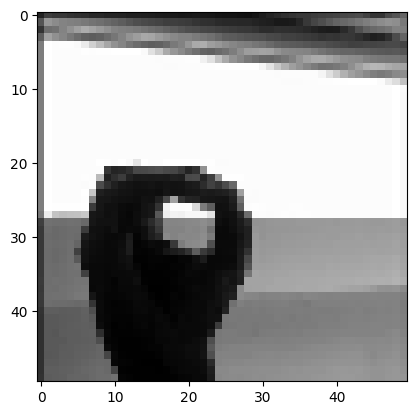

In [81]:
plt.imshow(x_train[57][:,:,0], cmap = 'gray')
plt.show()

In [82]:
# With data augmentation (adding noise + transformation) to prevent overfitting & make more realistic

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [83]:
# create convolutional neural network (CNN) model, https://www.tensorflow.org/tutorials/images/classification
model = Sequential()

# reduce learning rate when starts to stop improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

# compile model to recognise different data classes & normalise
# add 2D convolution layers, dense layers, batch layers, maxpool, flatten (2D --> 1D)
# condense to 24
# use batching to allow model to handle data more efficiently
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (50,50,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2)) # new
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 27 , activation = 'softmax'))

In [84]:
# Compile the model
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 75)        750       
                                                                 
 batch_normalization_3 (Bat  (None, 50, 50, 75)        300       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 25, 25, 75)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 50)        33800     
                                                                 
 dropout_3 (Dropout)         (None, 25, 25, 50)        0         
                                                                 
 batch_normalization_4 (Bat  (None, 25, 25, 50)       

In [86]:
# Train the model! (takes ages)
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 30 , validation_data = (x_test, y_test), callbacks = [learning_rate_reduction])

model.save('goated2.keras')

# models:
# smnist.h5, smnist2.h5, smnist3.h5, goated.keras

Epoch 1/30
254/254 [==============================] - 207s 815ms/step - loss: 0.8263 - accuracy: 0.7243 - val_loss: 6.9265 - val_accuracy: 0.1564 - lr: 0.0010
Epoch 2/30
254/254 [==============================] - 207s 815ms/step - loss: 0.5217 - accuracy: 0.8219 - val_loss: 0.6857 - val_accuracy: 0.7788 - lr: 0.0010
Epoch 3/30
254/254 [==============================] - 207s 814ms/step - loss: 0.3867 - accuracy: 0.8680 - val_loss: 1.0032 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 4/30
254/254 [==============================] - 204s 803ms/step - loss: 0.2873 - accuracy: 0.9046 - val_loss: 0.7430 - val_accuracy: 0.7876 - lr: 0.0010
Epoch 5/30
254/254 [==============================] - 205s 807ms/step - loss: 0.2494 - accuracy: 0.9141 - val_loss: 2.4869 - val_accuracy: 0.5902 - lr: 0.0010
Epoch 6/30
254/254 [==============================] - 205s 809ms/step - loss: 0.2098 - accuracy: 0.9287 - val_loss: 0.4718 - val_accuracy: 0.8616 - lr: 0.0010
Epoch 7/30
254/254 [==========================

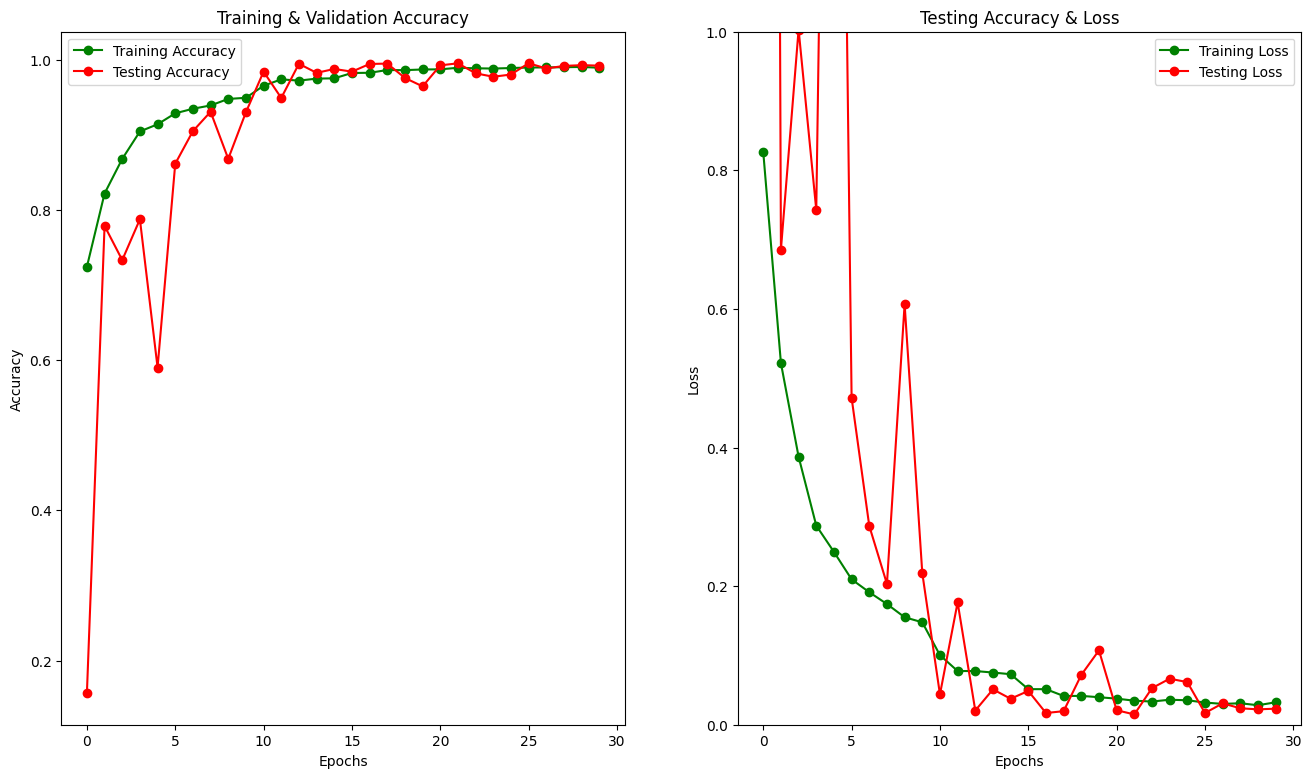

In [88]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.ylim(0,1)

plt.show()

## Processing image

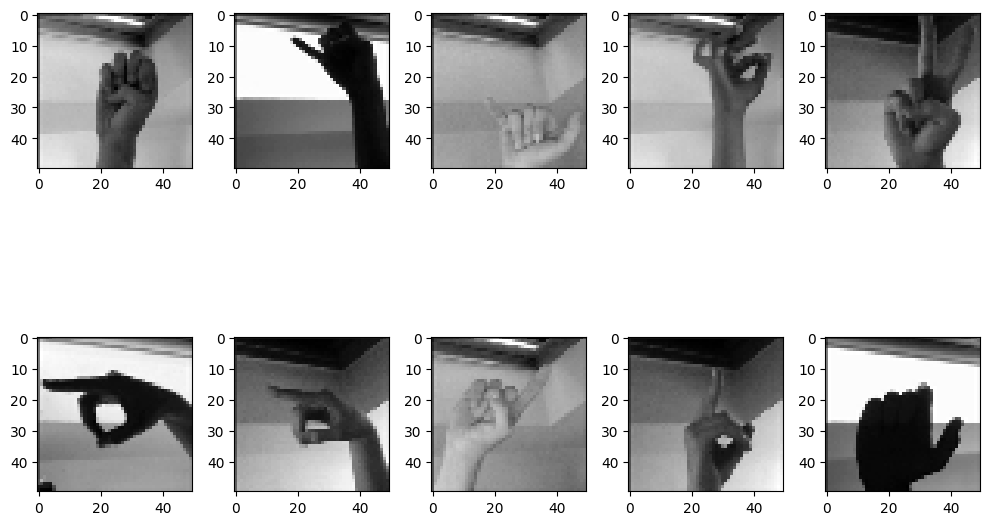

In [90]:
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(50, 50) , cmap = "gray")
        k += 1
    plt.tight_layout()

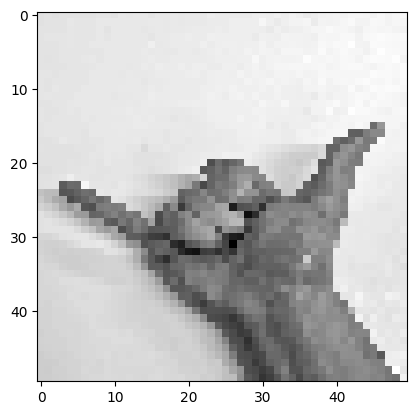

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,191.179993,192.639999,191.0,192.327591,193.0,193.0,193.179993,193.179993,194.0,194.360001,...,118.179932,114.835564,121.179932,126.0,125.114922,120.219971,121.967621,111.372002,106.959045,203.106628


In [97]:
from pandas.core.frame import DataFrame
image_path = '/hand-y.jpg'

image_size = [50,50]

image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1) # channel 0 = default, channel 1 = greyscale, channel 3 = rgb

# rotate?
#image = tf.image.rot90(image,k = -1 )

image = tf.image.resize(image, image_size)
#image = image / 255 # normalise

plt.imshow(image, cmap = 'gray')
plt.show()

np_im = image.numpy()
np_im.resize(1,50**2)
df = DataFrame()

df = pd.concat([df,pd.DataFrame(np_im)], ignore_index=True)
df.head()

In [98]:
np_image = image.numpy()
model = load_model('goated.keras')

data = np_image / 255
data = data.reshape(-1,50,50,1)

prediction = model.predict(data)
predarray = np.array(prediction[0])


1/1 [==============================] - 0s 164ms/step


In [99]:
letterpred = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing']

letter_prediction_dict = {letterpred[i]: predarray[i] for i in range(len(letterpred))}
predarrayordered = sorted(predarray, reverse=True)
high1 = predarrayordered[0]
high2 = predarrayordered[1]
high3 = predarrayordered[2]
for key,value in letter_prediction_dict.items():
    if value==high1:
        print("Predicted Character 1: ", key)
        print('Confidence 1: ', 100*value)
    elif value==high2:
        print("Predicted Character 2: ", key)
        print('Confidence 2: ', 100*value)
    elif value==high3:
        print("Predicted Character 3: ", key)
        print('Confidence 3: ', 100*value)

Predicted Character 2:  J
Confidence 2:  0.00010828125596162863
Predicted Character 3:  X
Confidence 3:  2.2609455641031673e-06
Predicted Character 1:  Y
Confidence 1:  99.9998927116394
